In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


72.931

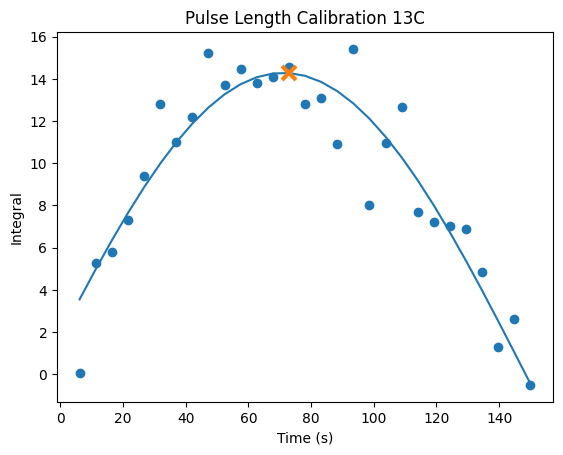

In [4]:
exp4 = pd.read_csv('/workspaces/nmr-spectroscopy/pulse-length-calibration-spectra13c1.csv')
xe4 = np.array(exp4.iloc[:,0])
ye4 = np.array(-exp4.iloc[:,1]) * 0.8
plt.scatter(xe4, ye4)

def pulselengthcalib(t,A,w,phi):
    return A*np.sin(w*t + phi)

params, _ = curve_fit(pulselengthcalib, xe4, ye4, p0 = [40, 0.001, 0])

fit = pulselengthcalib(xe4, *params)
plt.plot(xe4, fit)
params

max_index = np.argmax(fit)
plt.plot(xe4[max_index], fit[max_index], marker = 'x', markersize = 10, markeredgewidth = 3)
plt.title('Pulse Length Calibration 13C')
plt.ylabel('Integral')
plt.xlabel('Time (s)')
xe4[max_index]